<a href="https://colab.research.google.com/github/lwehausen/Simulation/blob/main/Trapezoidal_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#To run R in Google Colab:
%load_ext rpy2.ipython

In [ ]:
%%R
library(ggplot2)
library(dplyr)

#Trapezoidal Method for Integration

1. Consider the following integral: $\int_{-1}^{1} x^2dx$

$(a)$. Find the true value of the integral.

In [3]:
%%R
#do some calcoolus to find anti-derivative of function and then area under the curve:
f2 <- function(x) {x^3/3}
AUC = f2(1) - f2(-1)
AUC

[1] 0.6666667


$(b)$. Evaluate the integral using the trapezoidal method using $n=5$ trapezoids.

In [4]:
%%R
trapezoid <- function(ftn, a, b, n = 5) {
  h <- (b-a)/n
  x.vec <- seq(a,b, by=h)
  f.vec <- sapply(x.vec,ftn)
  T <- h*(f.vec[1]/2 + sum(f.vec[2:n]) + f.vec[n+1]/2)
  return(T)
}

ftnb <- function(x) return(x^2)
trapezoid(ftnb, -1, 1, n=5)

[1] 0.72


$(c)$. For each value of $n = 5,6,...,50$, evaluate the integral using $n$ trapezoids. For each value of $n$ calculate the absolute difference
between the true value and the approximated value. Plot the value of $n$ versus this error using an appropriate data visualization.

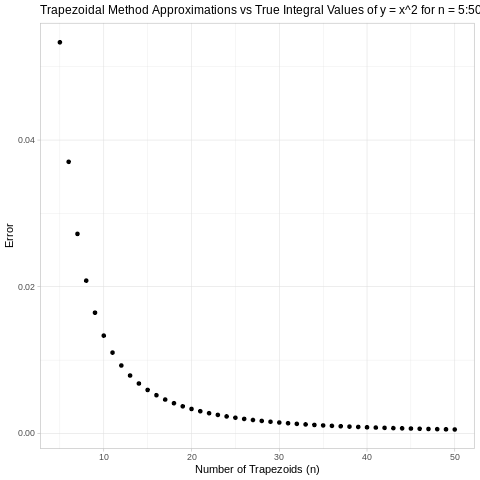

In [5]:
%%R
a = -1
b = 1
n_values <- 5:50
integrals <- sapply(n_values, function(n) trapezoid(ftnb,a,b,n))
results <- data.frame(n = n_values, approximated_value = integrals)
#print(results)

tru_integrals <- replicate(length(n_values), AUC)
results2 <- data.frame(n = n_values, true_value = tru_integrals)
#print(results2)

merge <- merge(results, results2, by = "n")
merge$difference <- abs(merge$true_value - merge$approximated_value)
#merge

cplot <- ggplot(merge, aes(x=n, y=difference)) + geom_point() + labs(x ="Number of Trapezoids (n)", y="Error", title = "Trapezoidal Method Approximations vs True Integral Values of y = x^2 for n = 5:50", axis.title = element_text(size = 5)) + theme_light() + theme(plot.title = element_text(size = 12))
cplot